# Uber supply demand gap assignment

In [1]:
#Importing the libraries needed.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file.
df = pd.read_csv('Uber Request Data.csv')
df.head(10)                #The top 10 data entries.

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


Let's look at some of the basic information in the given dataset.

In [3]:
#Inspecting the dataframe.
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


(None, (6745, 6))

In [4]:
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 9:40,12/7/2016 21:04
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


So there are 6745 rows and 6 columns. All the columns have an independent combination of int64, object and float64 data types. The column names are Request id, Pickup point, Driver id, Status, Request timestamp and Drop timestamp. Also some interesting insights have been found like there's null values in the columns Driver id and Drop timestamp as both have values not equal to 6745. Let's confirm our thoery in the next step. Also there are two unique pickup points considered here (airport and city) then the status has been divided in 3 categories which we'll inspect ahead. So far that is the data at hand let's analyse it further.

In [5]:
#Inspecting null values.
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Thus, there are null values in the columns Driver id and Drop timestamp. Thoery confirmed!

In [6]:
#Looking for duplicates.
sum(df.duplicated())==0

True

OKAY; Zero duplicate rows.

In [8]:
#Converting Request timestamp and Drop timestamp to datetime object.
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [9]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


Now that seems more readable.

In [10]:
#Extracting date, hour and time from Request timestamp.
df['Request date'] = df['Request timestamp'].dt.date
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request time'] = df['Request timestamp'].dt.time
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,08:33:16


In [11]:
#Extracting date, hour and time from Drop timestamp.
df['Drop date'] = df['Drop timestamp'].dt.date
df['Drop hour'] = df['Drop timestamp'].dt.hour
df['Drop time'] = df['Drop timestamp'].dt.time
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request time,Drop date,Drop hour,Drop time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,11:51:00,2016-11-07,13.0,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,17:57:00,2016-11-07,18.0,18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,09:17:00,2016-12-07,9.0,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,21:08:00,2016-12-07,22.0,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,08:33:16,2016-07-13,9.0,09:25:47


In [12]:
#Creating a function of timeslots for Request hour.
def timeslot(x):
    if x<4:
        return 'Late night'
    elif 4<x<=7:
        return 'Early morning'
    elif 7<x<=12:
        return 'Morning'
    elif 12<x<=16:
        return 'Afternoon'
    elif 16<x<=18:
        return 'Evening'
    elif 18<x<=20:
        return 'Late evening'
    elif 20<x<=23:
        return 'Night'
    else:
        return 'Midnight'
#Creating the column of timeslot
df['Time slot'] = df['Request hour'].apply(lambda x: timeslot(x))

In [13]:
#Also creating the column of Number of Requests which will be one obviously.
df['No of Requests'] = 1
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request time,Drop date,Drop hour,Drop time,Time slot,No of Requests
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,11:51:00,2016-11-07,13.0,13:00:00,Morning,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,17:57:00,2016-11-07,18.0,18:47:00,Evening,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,09:17:00,2016-12-07,9.0,09:58:00,Morning,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,21:08:00,2016-12-07,22.0,22:03:00,Night,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,08:33:16,2016-07-13,9.0,09:25:47,Morning,1


Okay now we have sufficient data extracted from the given data sets. Let's start with some EDA.

In [14]:
#Checking the number of failed requests.
df[(df['Drop timestamp'].isnull())].groupby('Status').count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request date,Request hour,Request time,Drop date,Drop hour,Drop time,Time slot,No of Requests
Status,,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,0,0,0,1264,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,0,0,0,2650,2650


Thus, 1264 times requests were cancelled while 2650 times cars were not available. This shows that driver cancellation and non-availability of cars are the main problems leading to loss of potential revenue.

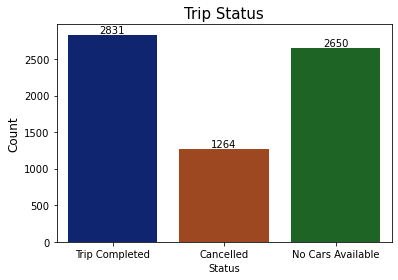

In [15]:
# Creating a plot to check the trip status by comparing three columns namely Trip completed, Cancelled and No cars available.
plt.title('Trip Status', fontsize=15)
plot = sns.countplot(df['Status'], palette='dark', data=df)
plt.ylabel('Count', fontsize=12)
for x in plot.patches:
    plot.annotate(format(x.get_height()),(x.get_x()+x.get_width()/2, x.get_height()), ha='center', va='bottom')
plt.show()

We can observe from the given data We can observe from the given data that only half of the requests from city and airport are completed.that only half of the requests from city and airport are completed.

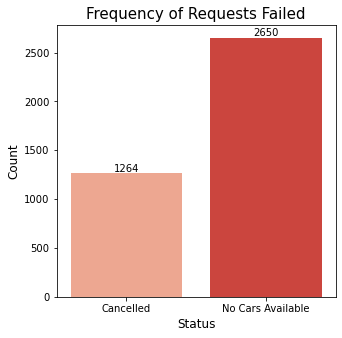

In [17]:
#Creating a plot to check the frequency of failed requests and trying to find the reason behuind it statistically.
requests_failed = df[df.Status != "Trip Completed"]  
plt.figure(figsize=(5,5))
plt.title('Frequency of Requests Failed',fontsize=15)
a=sns.countplot(x='Status',palette='Reds', data=requests_failed)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show() 

Thus, the frequency of no cars available (2650) is more than the cancellation of requests (1264).

Hmm, interesting! Now that we know that the requests are being failed let's find out the frequency from where is it being failed, i.e. either from the airport or the city.

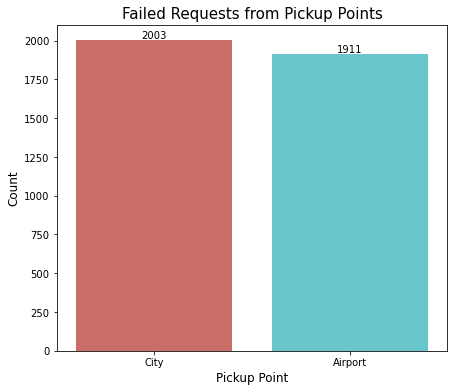

In [18]:
#Creating a plot for the failed requests from the pickup points of airport and the city.
plt.figure(figsize=(7,6))
plt.title('Failed Requests from Pickup Points',fontsize=15)
fail_req_pickup = sns.countplot(x='Pickup point',palette='hls', data=requests_failed)  
plt.xlabel('Pickup Point', fontsize=12)
plt.ylabel('Count', fontsize=12)
for x in fail_req_pickup.patches:
    fail_req_pickup.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

Okay so the plot suggets that the majority of requests are failed from the city which makes sense again as the drivers have to travel a long distance to reach the airport and they may or may not get a fare while returning.

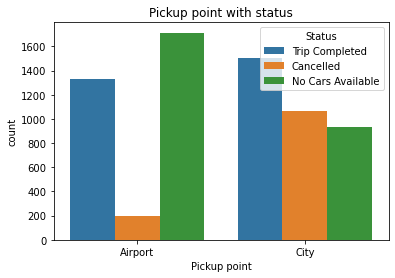

In [19]:
#Creating a plot to compare the stats of trip completed, cancelled and no cars available columns for airport and city.
plt.title("Pickup point with status")
sns.countplot(x=df['Pickup point'],hue ='Status',data = df)
plt.show()

Okay, now we're getting more insights from the data solidifying our previous theory that majority of requests failed from the city. But there's also something interesting here that cars are not available at the airport more often as comapred to the city.

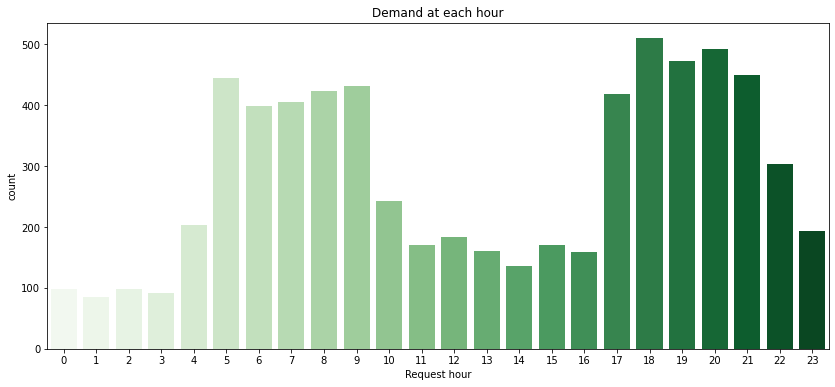

In [20]:
#Creating a plot of trip status according to the time of the day.
plt.figure(figsize=(14, 6))
plt.title('Demand at each hour')
sns.countplot(x='Request hour', data=df,palette='Greens')
plt.show()

Interesting. There are a lot of requests from 5am to 9am and 5pm to 10 pm. So these are the peak hours. Let's go a step deeper and see if the early mornings, evenings and the night shifts are the prime time of the day or is there a specific winner here.

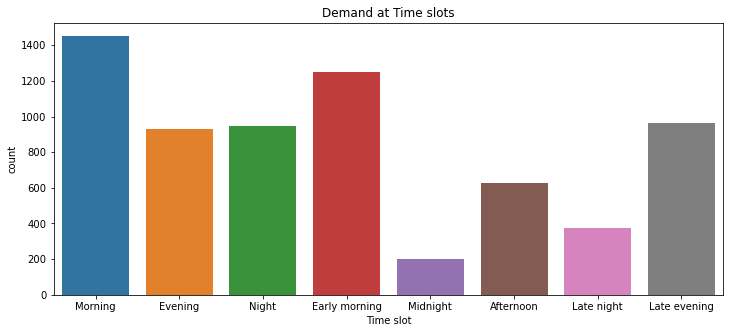

In [21]:
#Creating a plot of timeslot vs count.
plt.figure(figsize=(12, 5))
plt.title('Demand at Time slots')
t =sns.countplot(x='Time slot', data=df)
plt.show()

Okay clearly the mornings are the winner here followed by the evenings. Also it's interesting to see that people prefer to request for a ride the least at midnight and late night.

Now let's go a step deeper again and see if there is a pattern in this morning and evening hours.

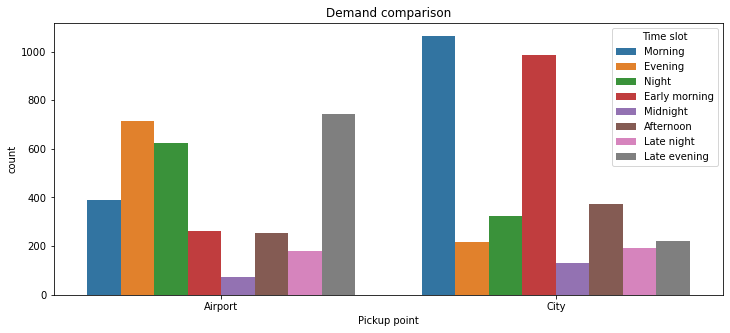

In [22]:
#Creating a plot for comaprison of timeslots between airport and city.
plt.figure(figsize=(12, 5))
plt.title('Demand comparison')
sns.countplot(x='Pickup point', hue="Time slot", data=df)
plt.show()

Okay so requests from the city are more in the morning while requests from the airport are more in the evening.

Having studied the demand now let's see the supply data at once.

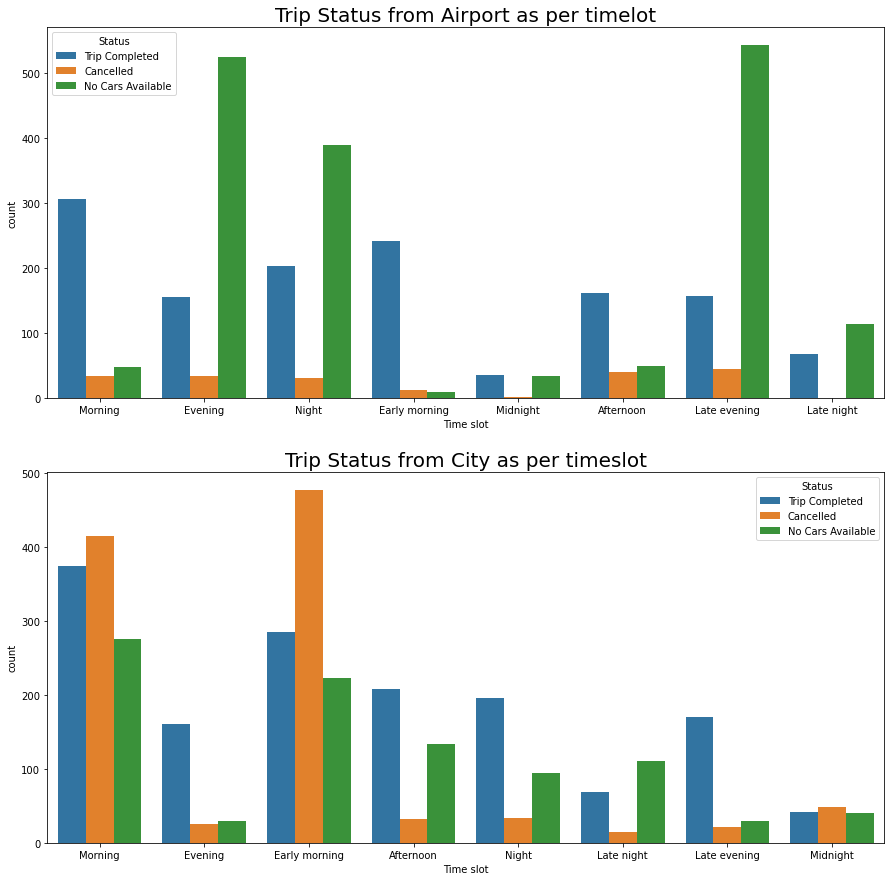

In [24]:
#Creating plot for supply comparison.
df_airport = df[(df['Pickup point'] == 'Airport')]
df_city = df[(df['Pickup point'] == 'City')]

plt.subplots(figsize = (15, 15))

#subplot 1
plt.subplot(2, 1, 1)
plt.title('Trip Status from Airport as per timelot', size = 20)
sns.countplot(x = "Time slot", hue = 'Status', data = df_airport);

#subplot 2
plt.subplot(2, 1, 2)
plt.title('Trip Status from City as per timeslot', size = 20)
sns.countplot(x = "Time slot", hue = 'Status', data = df_city);

plt.show()

Okay so this is the problem; the demand from the airport is the highest in the evening but there aren't cars available; while the demand from the city is highest in the morning but the trip keeps getting cancelled a lot. Clearly there's a supply-demand gap here.

Since the problem has been stated (supply-demand gap) let's dive deeper in studying and calculating this gap.

In [25]:
#Counting 'cancelled' and 'no cars available' status with respect to timeslots.
df[(df['Drop timestamp'].isnull())].groupby(['Status','Time slot']).size()

Status             Time slot    
Cancelled          Afternoon         72
                   Early morning    490
                   Evening           59
                   Late evening      65
                   Late night        14
                   Midnight          51
                   Morning          449
                   Night             64
No Cars Available  Afternoon        184
                   Early morning    233
                   Evening          554
                   Late evening     573
                   Late night       225
                   Midnight          74
                   Morning          323
                   Night            484
dtype: int64

In [32]:
#Calculating the gap between the demand and supply.
df['Demand'] = 1
df['Supply'] = 0
df.loc[(df['Status'] == 'Trip Completed'),'Supply'] = 1
df['Gap'] = df['Demand'] - df['Supply'] 
df.loc[df['Gap']==0,'Gap'] = 'Completed Ride'  
df.loc[df['Gap']==1,'Gap'] = 'Not Completed'
df.groupby(['Gap']).size()

Gap
Completed Ride    2831
Not Completed     3914
dtype: int64

Thus the total gap between the demand and the supply is 3914 which is a significant number. And the two main reasons for this downfall is non availability of cars and cancellation of trips.

Let's dive deeper now and analyse this gap from different perspectives.

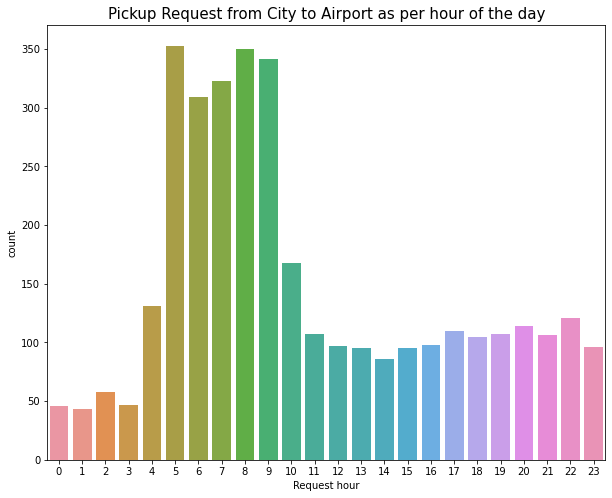

In [33]:
#Studying the demand from the city to airport.
df_city1 = df[(df['Pickup point'] == 'City')]

plt.subplots(figsize = (10, 8))
plt.title('Pickup Request from City to Airport as per hour of the day', size = 15)
sns.countplot(x = "Request hour",  data = df_city1)

plt.show()

In [39]:
df1 = pd.DataFrame()
df1 = df.copy()
df1['Status'] = 'Demand'
df2 = df.append(df1)

# Replaceing no car available and cancelled status as gap
# Replaceing Trip completed as supply
df2['Status'] = df2['Status'].replace(['Cancelled','No Cars Available'],'Gap')
df2['Status'] = df2['Status'].replace(['Trip Completed'],'Supply')

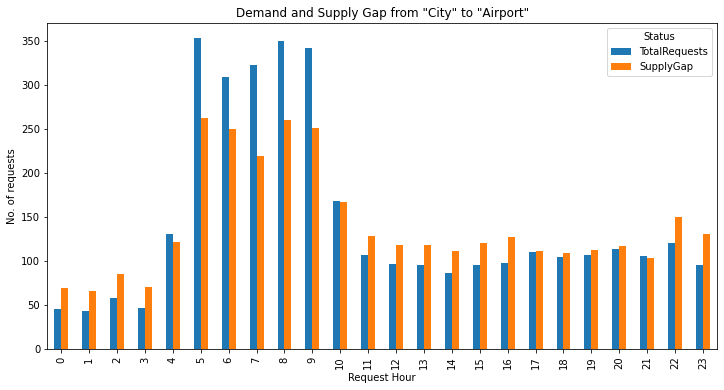

In [40]:
#Analysing Demand and Supply Gap from "City" to "Airport"
df_city1.loc[:, ['TotalRequests', 'SupplyGap']].plot(kind = 'bar', figsize=(12,6))
plt.title('Demand and Supply Gap from "City" to "Airport"')
plt.ylabel('No. of requests')
plt.show()

In [35]:
#Analysing the supply-demand from city to airport.
df_city1 = dfgrp2.loc['City'].T
df_city1['TotalRequests'] = df_city1['Cancelled'] +  df_city1['No Cars Available'] + df_city1['Trip Completed']
df_city1['SupplyGap'] = df_city1['TotalRequests'] - df_city1['Cancelled'] +  df_city1['No Cars Available']
df_city1

Status,Cancelled,No Cars Available,Trip Completed,TotalRequests,SupplyGap
Request Hour,,,,,
0,3.0,26.0,17.0,46.0,69.0
1,4.0,27.0,12.0,43.0,66.0
2,5.0,32.0,21.0,58.0,85.0
3,2.0,26.0,19.0,47.0,71.0
4,49.0,40.0,42.0,131.0,122.0
5,172.0,81.0,100.0,353.0,262.0
6,141.0,82.0,86.0,309.0,250.0
7,164.0,60.0,99.0,323.0,219.0
8,176.0,86.0,88.0,350.0,260.0


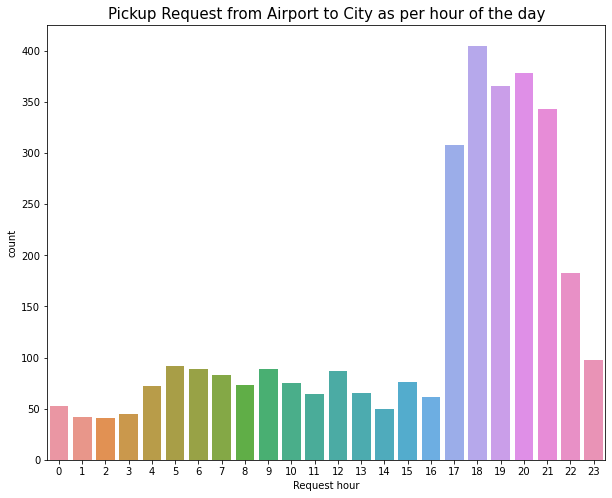

In [36]:
#Studying the demand from the airport to city.
df_airport1 = df[(df['Pickup point'] == 'Airport')]

plt.subplots(figsize = (10, 8))
plt.title('Pickup Request from Airport to City as per hour of the day', size = 15)
sns.countplot(x = "Request hour",  data = df_airport1)

plt.show()

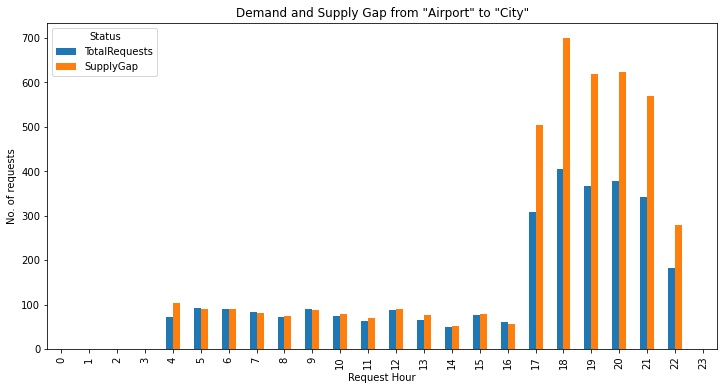

In [41]:
#Analysing Demand and Supply Gap from "Airport" to "City".
df_airport1.loc[:,['TotalRequests', 'SupplyGap']].plot(kind = 'bar', figsize=(12,6))
plt.title('Demand and Supply Gap from "Airport" to "City"')
plt.ylabel('No. of requests')
plt.show()

In [38]:
#Analysing the supply-demand from the airport to city.
df_airport1 = dfgrp2.loc['Airport'].T
df_airport1['TotalRequests'] = df_airport1['Cancelled'] +  df_airport1['No Cars Available'] + df_airport1['Trip Completed']
df_airport1['SupplyGap'] = df_airport1['TotalRequests'] - df_airport1['Cancelled'] +  df_airport1['No Cars Available']
df_airport1

Status,Cancelled,No Cars Available,Trip Completed,TotalRequests,SupplyGap
Request Hour,,,,,
0,NaN,30.0,23.0,NaN,NaN
1,NaN,29.0,13.0,NaN,NaN
2,NaN,25.0,16.0,NaN,NaN
3,NaN,30.0,15.0,NaN,NaN
4,2.0,34.0,36.0,72.0,104.0
5,4.0,3.0,85.0,92.0,91.0
6,4.0,4.0,81.0,89.0,89.0
7,5.0,3.0,75.0,83.0,81.0
8,2.0,4.0,67.0,73.0,75.0


In [43]:
# To Check for overall supply demand and gap accross city and airport.

# Total Demand.
Total_Demand_Overall = df2[(df2["Status"] == "Demand")] 
len(Total_Demand_Overall.index)

6745

In [44]:
# Total Supply.
Total_Supply_Overall = df2[(df2["Status"] == 'Supply')]
len(Total_Supply_Overall.index)

2831

In [45]:
# Total Supply-Demand Gap.
Supply_Demand_Gap_Overall = df2[(df2["Status"] == 'Gap')]
len(Supply_Demand_Gap_Overall.index)


3914

In [46]:
#Percentage difference in demand supply.
Percentage_Diff_Overall = (((len(df2[(df2["Status"] == 'Supply')].index))/(len(df2[(df2["Status"] == 'Demand')].index)))*100)
Percentage_Diff_Overall

41.971830985915496

In [47]:
# Total Demand in City.
Total_Demand_City = df2[(df2["Pickup point"] == "City") & (df2["Status"] == "Demand")] 
len(Total_Demand_City.index)

3507

In [48]:
# Total Supply in City.
Total_Supply_City = df2[(df2["Pickup point"] == "City") & (df2["Status"] == "Supply")]
len(Total_Supply_City.index)

1504

In [49]:
# Total Gap in City.
Supply_Demand_Gap_City = df2[(df2["Pickup point"] == "City") & (df2["Status"] == "Gap")] 
len(Supply_Demand_Gap_City.index)

2003

In [50]:
#Percentage difference in demand supply.
Percentage_Diff_City = (((len(df2[(df2["Pickup point"] == "City") & (df2["Status"] == "Supply")].index))/
                            (len(df2[(df2["Pickup point"] == "City") & (df2["Status"] == "Demand")].index)))*100)
Percentage_Diff_City

42.88565725691475

In [51]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')                   # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

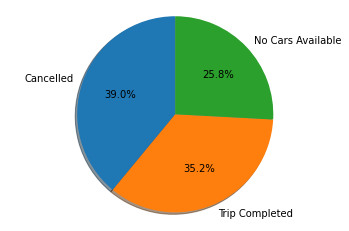

In [52]:
# Percentage breakup of status on the basis of pickup location
# Status of trips in Morning where pickup point is City
df_city = df.loc[(df["Pickup point"] == "City") & (df["Time slot"] == "Morning")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

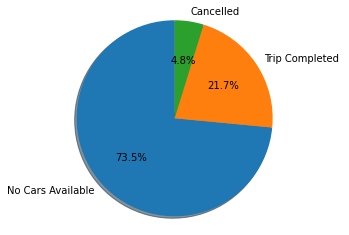

In [53]:
# Status of trips in Evening where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df["Time slot"] == "Evening")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)